In [8]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io

In [27]:
paths = [
    "aorta",
]

CASES = [
    "sim_wom_rcr"
]

meshes = [
    "coarse",
    "medium",
    "fine",
    "fine_2",
    "fine_3",
    "fine_4"
]

quants   = [
 "pressure_0",
 "vWSS_3_boundary",
 "velocity_3"
]

generation = "converge"

models   = list(range(1))
dt       = 0.01

tups = []

for case in CASES:
    for p in paths:
            for m in meshes:
                    CSV    = "/media/marsdenlab/Data1/UQ/0110/"+case+"/converge"+'/'+p+".csv"
                    
                    OUTPUT = "/media/marsdenlab/Data1/UQ/0110/"+case+"/"+str(generation)+"/"+m
                    io.mkdir(OUTPUT)
                    OUTPUT = OUTPUT+'/'+p
                    io.mkdir(OUTPUT)
                    print(CSV)
                    df = pd.read_csv(CSV)
                    
                    points = df['point'].unique()
                    point = points[-1]
                    
                    df = df.loc[df['point'] == point]
                    df = df.loc[df['mesh']==m]
                    
                    
                    
                    tups.append( (case,p,m,df,OUTPUT) )
                    
DATA = pd.concat([t[3] for t in tups])

/media/marsdenlab/Data1/UQ/0110/sim_wom_rcr/converge/aorta.csv
/media/marsdenlab/Data1/UQ/0110/sim_wom_rcr/converge/aorta.csv
/media/marsdenlab/Data1/UQ/0110/sim_wom_rcr/converge/aorta.csv
/media/marsdenlab/Data1/UQ/0110/sim_wom_rcr/converge/aorta.csv
/media/marsdenlab/Data1/UQ/0110/sim_wom_rcr/converge/aorta.csv
/media/marsdenlab/Data1/UQ/0110/sim_wom_rcr/converge/aorta.csv


In [28]:
df.iloc[:5]

,Unnamed: 0,area,generation,length,mesh,model,nx,ny,nz,path,...,velocity_0_boundary,velocity_1,velocity_1_boundary,velocity_2,velocity_2_boundary,velocity_3,velocity_3_boundary,x,y,z
28487,28487,0.887346,converge,3.348133,fine_4,0,-0.366026,0.410106,-0.833887,aorta,...,0.0,11.374827,0.0,-25.874330,0.0,29.730341,0.0,-5.304529,5.019923,-19.121008
28488,28488,0.887346,converge,3.348133,fine_4,0,-0.366026,0.410106,-0.833887,aorta,...,0.0,37.125079,0.0,-84.906923,0.0,97.232900,0.0,-5.304529,5.019923,-19.121008
28489,28489,0.887346,converge,3.348133,fine_4,0,-0.366026,0.410106,-0.833887,aorta,...,0.0,61.528803,0.0,-138.964353,0.0,161.031321,0.0,-5.304529,5.019923,-19.121008
28490,28490,0.887346,converge,3.348133,fine_4,0,-0.366026,0.410106,-0.833887,aorta,...,0.0,74.401539,0.0,-165.714662,0.0,194.973877,0.0,-5.304529,5.019923,-19.121008
28491,28491,0.887346,converge,3.348133,fine_4,0,-0.366026,0.410106,-0.833887,aorta,...,0.0,124.903476,0.0,-238.420009,0.0,281.896639,0.0,-5.304529,5.019923,-19.121008


In [29]:
d = tups[0][3]
print(d.shape)
print(len(tups))

(61, 35)
6


No handles with labels found to put in legend.


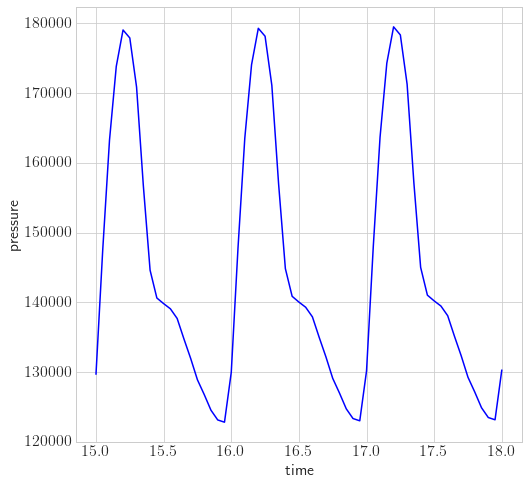

No handles with labels found to put in legend.


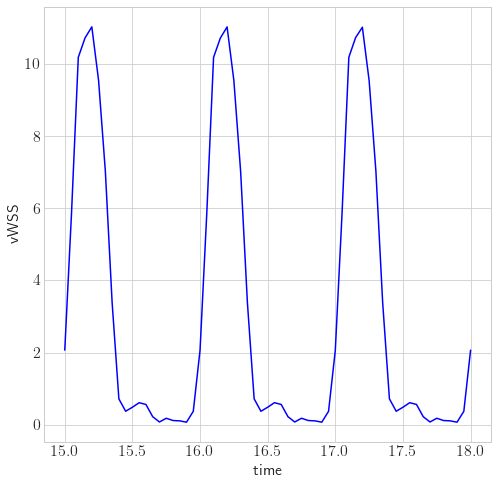

No handles with labels found to put in legend.


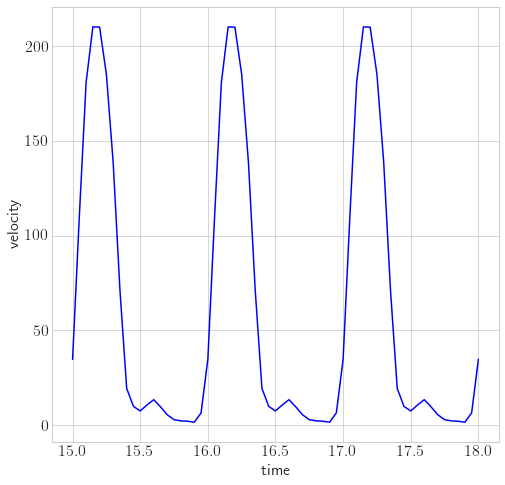

No handles with labels found to put in legend.


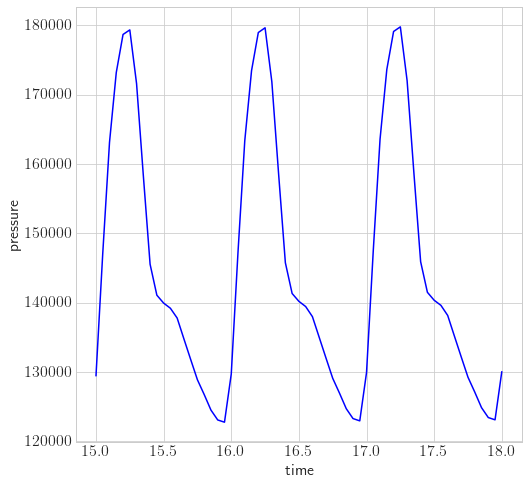

No handles with labels found to put in legend.


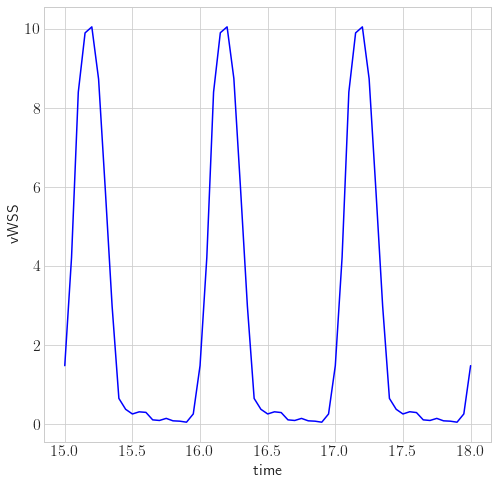

No handles with labels found to put in legend.


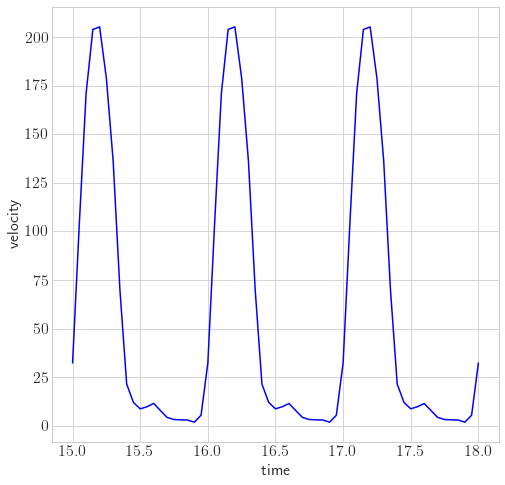

No handles with labels found to put in legend.


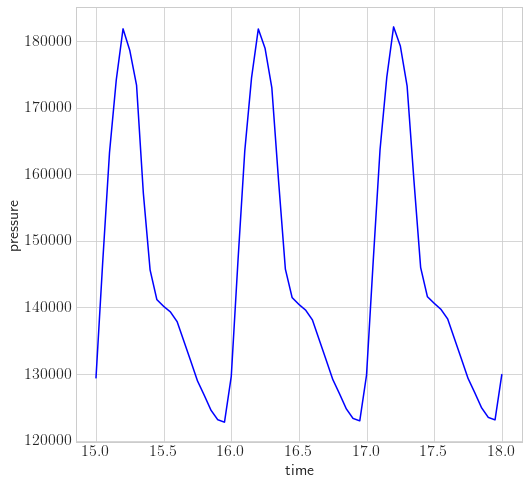

No handles with labels found to put in legend.


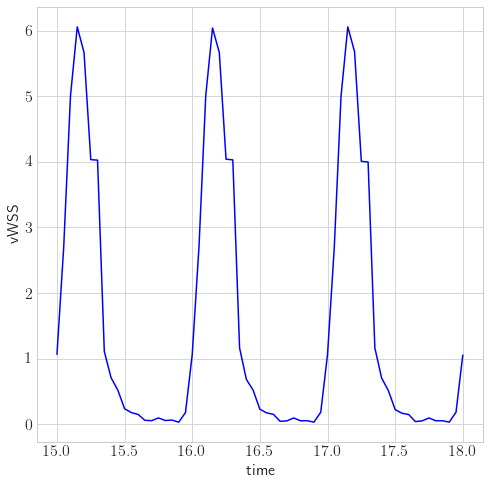

No handles with labels found to put in legend.


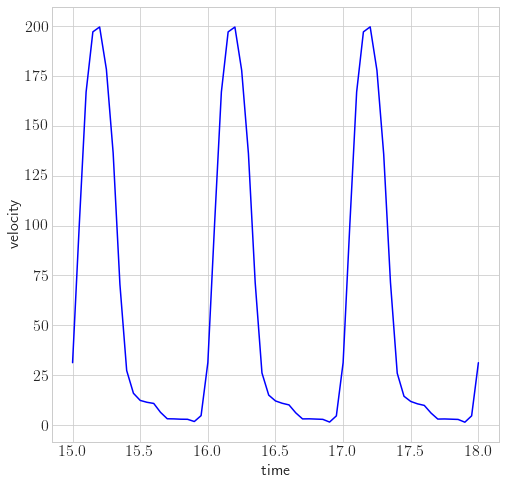

No handles with labels found to put in legend.


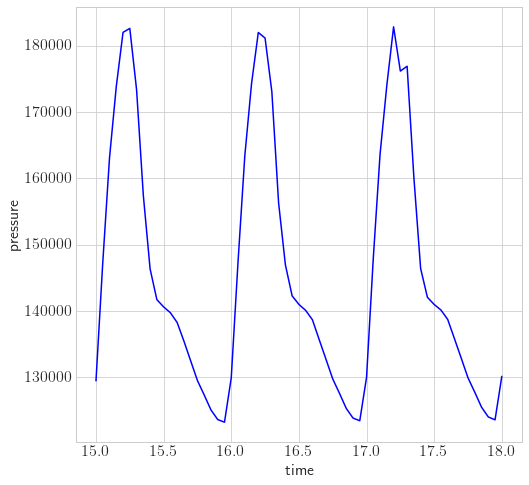

No handles with labels found to put in legend.


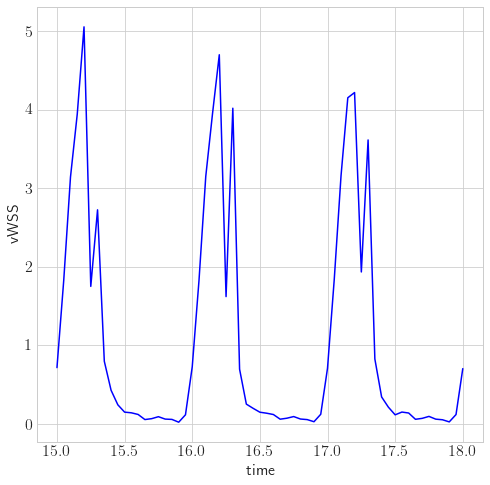

No handles with labels found to put in legend.


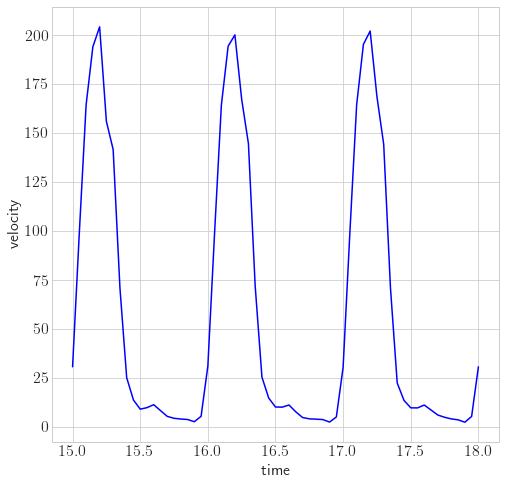

No handles with labels found to put in legend.


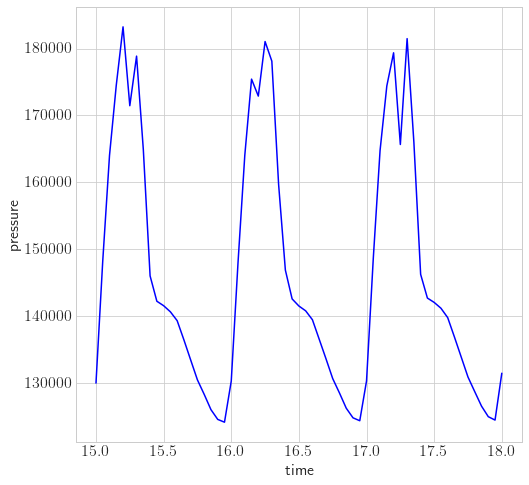

No handles with labels found to put in legend.


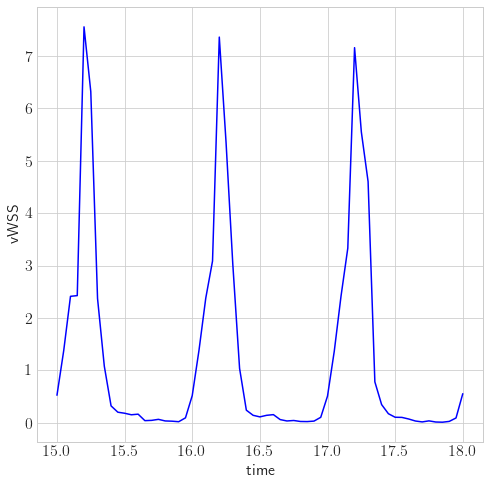

No handles with labels found to put in legend.


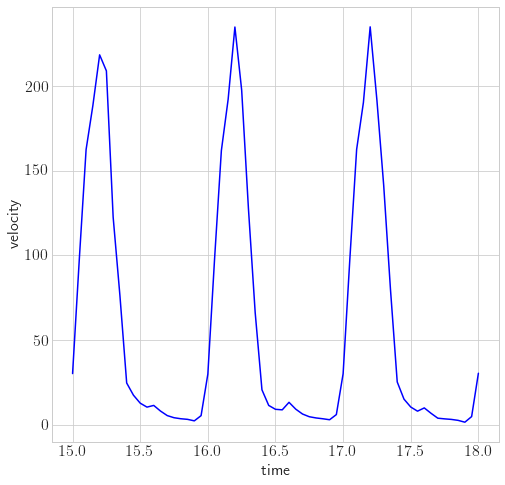

No handles with labels found to put in legend.


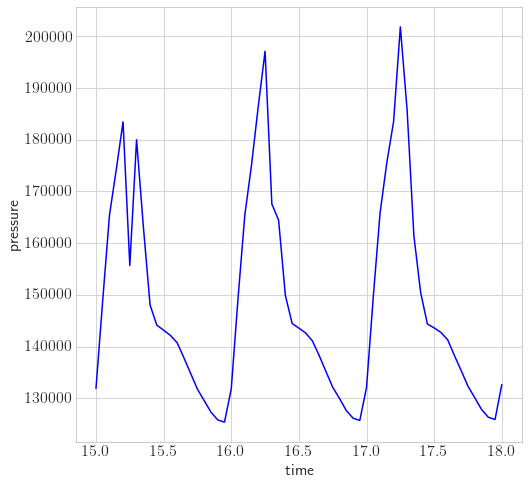

No handles with labels found to put in legend.


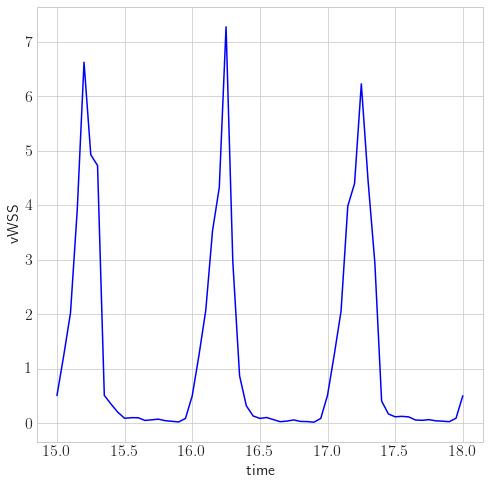

No handles with labels found to put in legend.


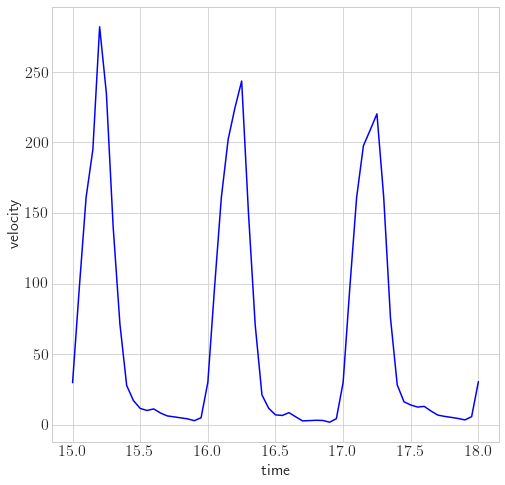

In [30]:
for t in tups:
    case,path,mesh,df,OUTPUT = t
    
    for q in quants:
        series_x = []
        series_y = []
        for m in models:
            data = df.loc[(df['model'] == m) & (df['generation'] == generation)]

            if data.shape[0] == 0: continue

            y = data[q].values
            x = data['time'].values*dt

            series_x.append(x)
            series_y.append(y)

        Y = np.array(series_y)
        X = np.array(series_x)
        
        label = q.split('_')[0]
        
        plt.figure(figsize=(8,8))
        plt.plot(X.T,Y.T, color='b')
        plt.xlabel("time")
        plt.ylabel(label)
        plt.legend()
        plt.savefig(OUTPUT+'/'+q+'.png',dpi=300)
        plt.savefig(OUTPUT+'/'+q+'.pdf',dpi=200)
        
        plt.show()
        plt.close()

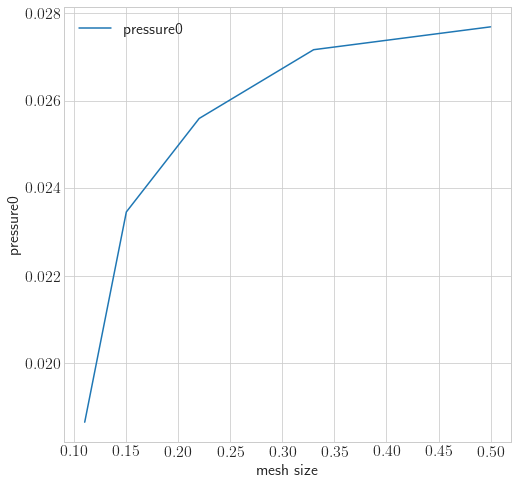

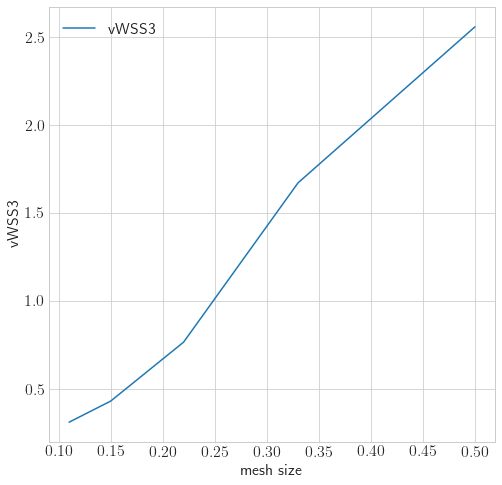

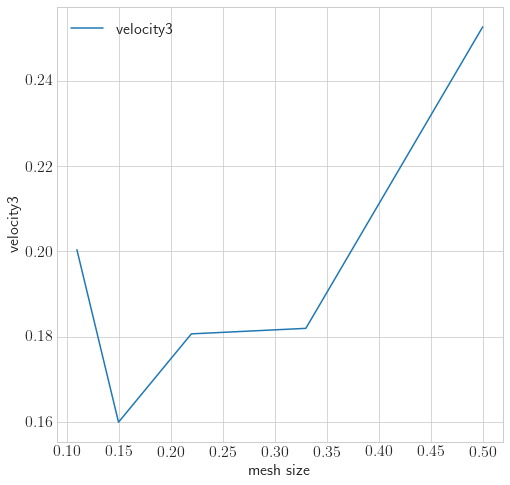

In [31]:
T = 100
mesh_sizes = [0.5,0.33,0.22,0.15,0.11]
for q in quants:
        label = q.replace('_','')
        err = []
        y_fine = DATA.loc[DATA['mesh']=='fine_4'][q].values[-T:]
        
        for mesh in ['coarse','medium','fine','fine_2',"fine_3"]:
            y_mesh = DATA.loc[DATA['mesh']==mesh][q].values[-T:]

            err.append(np.mean(np.abs((y_fine-y_mesh)/y_fine)))

        
        plt.figure(figsize=(8,8))
        plt.plot(mesh_sizes, err, label=label)
        plt.xlabel("mesh size")
        plt.ylabel(label)
        plt.legend()
        plt.savefig(OUTPUT+'/'+q+'_err_converge.png',dpi=300)
        plt.savefig(OUTPUT+'/'+q+'_err_converge.pdf',dpi=200)

        plt.show()
        plt.close()